#  `pore_size_distribution`

Calculates the pore size distribution in the image produced by either `local thickness` or `porosimetry` method where each voxel in the image shows the radius of the largest sphere (circle in 2D) that would overlap it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
inspect.signature(ps.metrics.pore_size_distribution)

<Signature (im, bins=10, log=True, voxel_size=1)>

## `im`
The input image csontaining the sizes of the largest sphere that overlaps each voxel. This image can be generated by implementing ``porosimetry`` or ``local_thickness`` filter on a binary image. Let's generate a test image:

  0%|          | 0/25 [00:00<?, ?it/s]

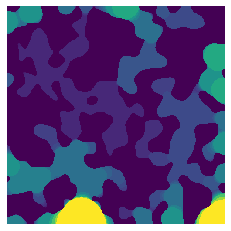

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[500, 500])
im = ps.filters.porosimetry(im)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

Now we can calculate the size distributions in the test image. `pore_size_distribution` returns a custom object with information of the distribution of the pore sizes. The x axis in the following images is the Log(pore radius).The histogram of logarithm (base-10) of pore sizes is useful to plot wide size distributions or to better visualize the data in the small size region. 

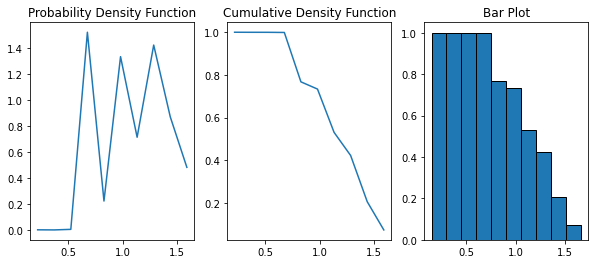

In [3]:
data = ps.metrics.pore_size_distribution(im=im)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `bins`

The default number of bins for the histogram is 10. Let's increase the bins to 100:

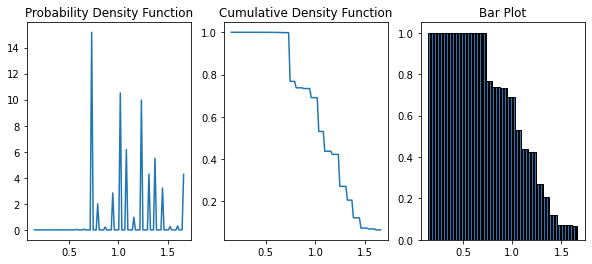

In [4]:
data = ps.metrics.pore_size_distribution(im=im, bins=100)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

Plot results:

## `log`

By default, the histogram binning is based on log(pore radius). We can calculate the size distribution base on pore radius with `log=False`. The resulting histogram binning is then performed on the pore radius values instead of log(pore radius.
Note that for calculating the pore sizes base on diameter, `bin_centers` returned by `pore_size_distribution` must be multiplied by 2.

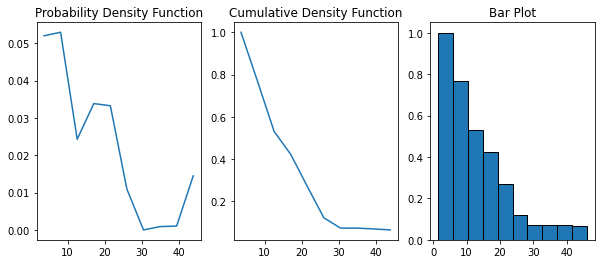

In [5]:
data = ps.metrics.pore_size_distribution(im=im, log=False)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.bin_centers,data.pdf)
ax[1].plot(data.bin_centers,data.cdf)
ax[2].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact:

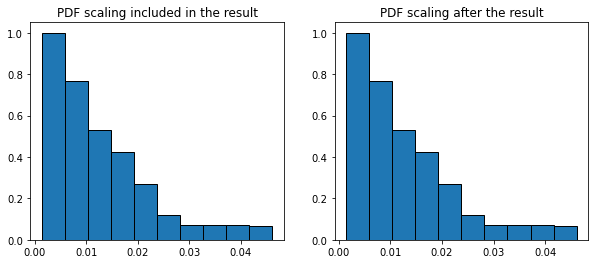

In [6]:
voxel_size=1e-3
data = ps.metrics.pore_size_distribution(im=im, voxel_size=voxel_size, log=False)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].bar(data.bin_centers, data.cdf, data.bin_widths, edgecolor='k');
ax[0].set_title("PDF scaling included in the result");
data = ps.metrics.pore_size_distribution(im=im, log=False)
ax[1].bar(data.bin_centers*voxel_size, data.cdf, data.bin_widths*voxel_size, edgecolor='k');
ax[1].set_title("PDF scaling after the result");